In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/Bank-Customer-Attrition-Insights-Data.csv")

In [ ]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (10000, 18)

First few rows:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15598695    Fields          619    France  Female   42   
1          2    15649354  Johnston          608     Spain  Female   41   
2          3    15737556  Vasilyev          502    France  Female   42   
3          4    15671610    Hooper          699    France  Female   39   
4          5    15625092   Colombo          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1        

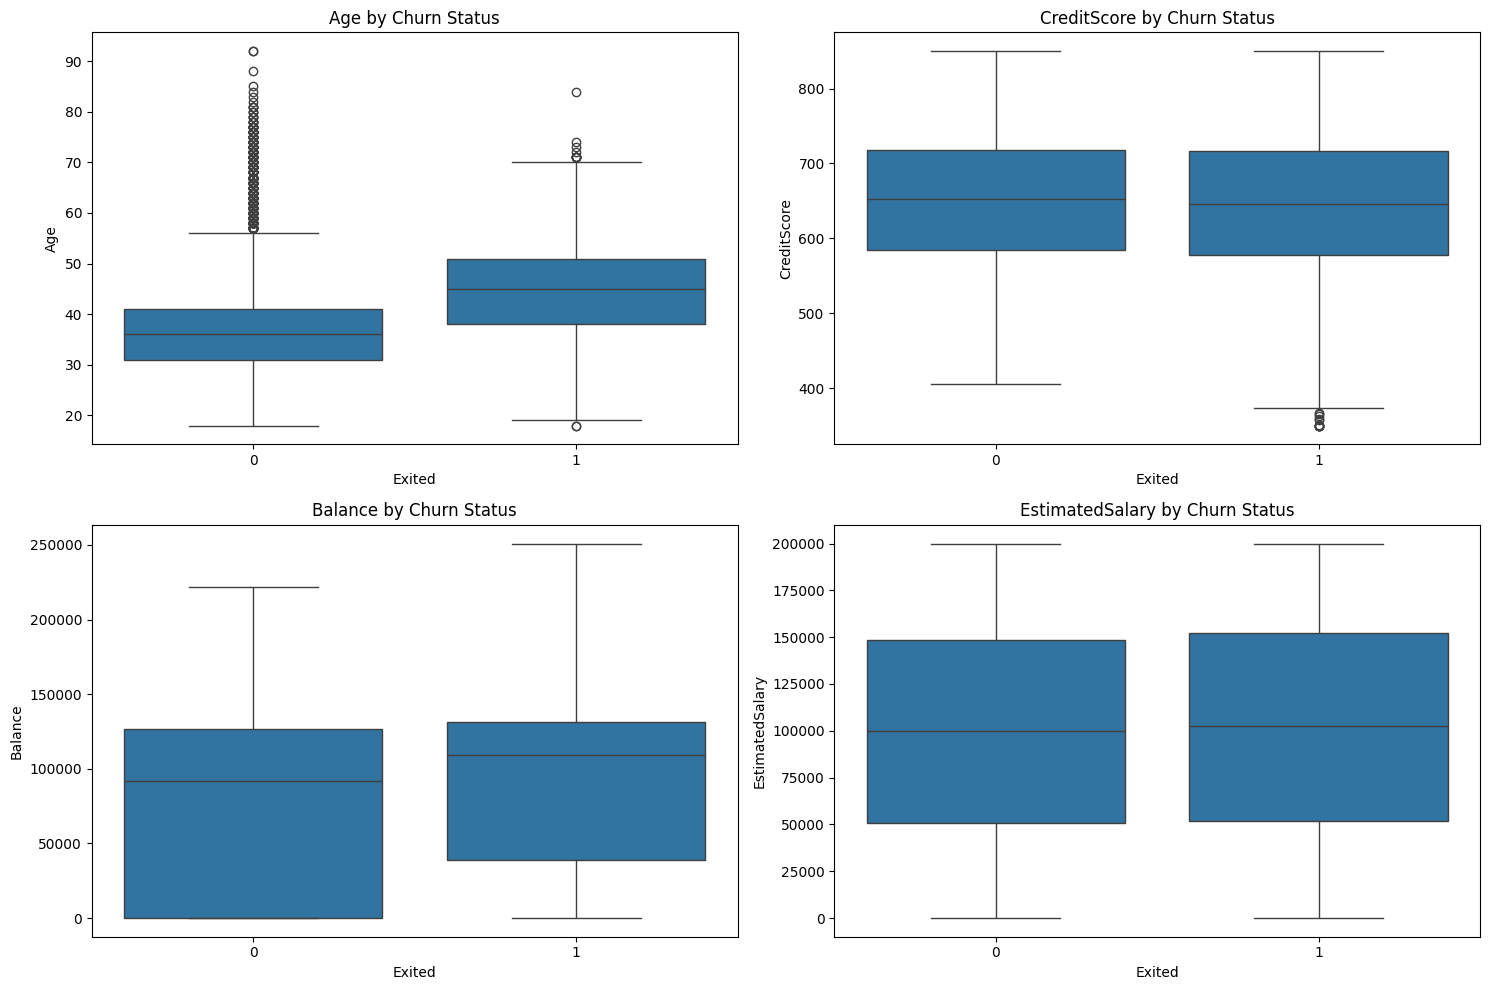

In [ ]:
# Analyze key numerical features
numerical_features = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']


# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Exited', y=feature, data=df)
    plt.title(f'{feature} by Churn Status')
plt.tight_layout()
plt.show()

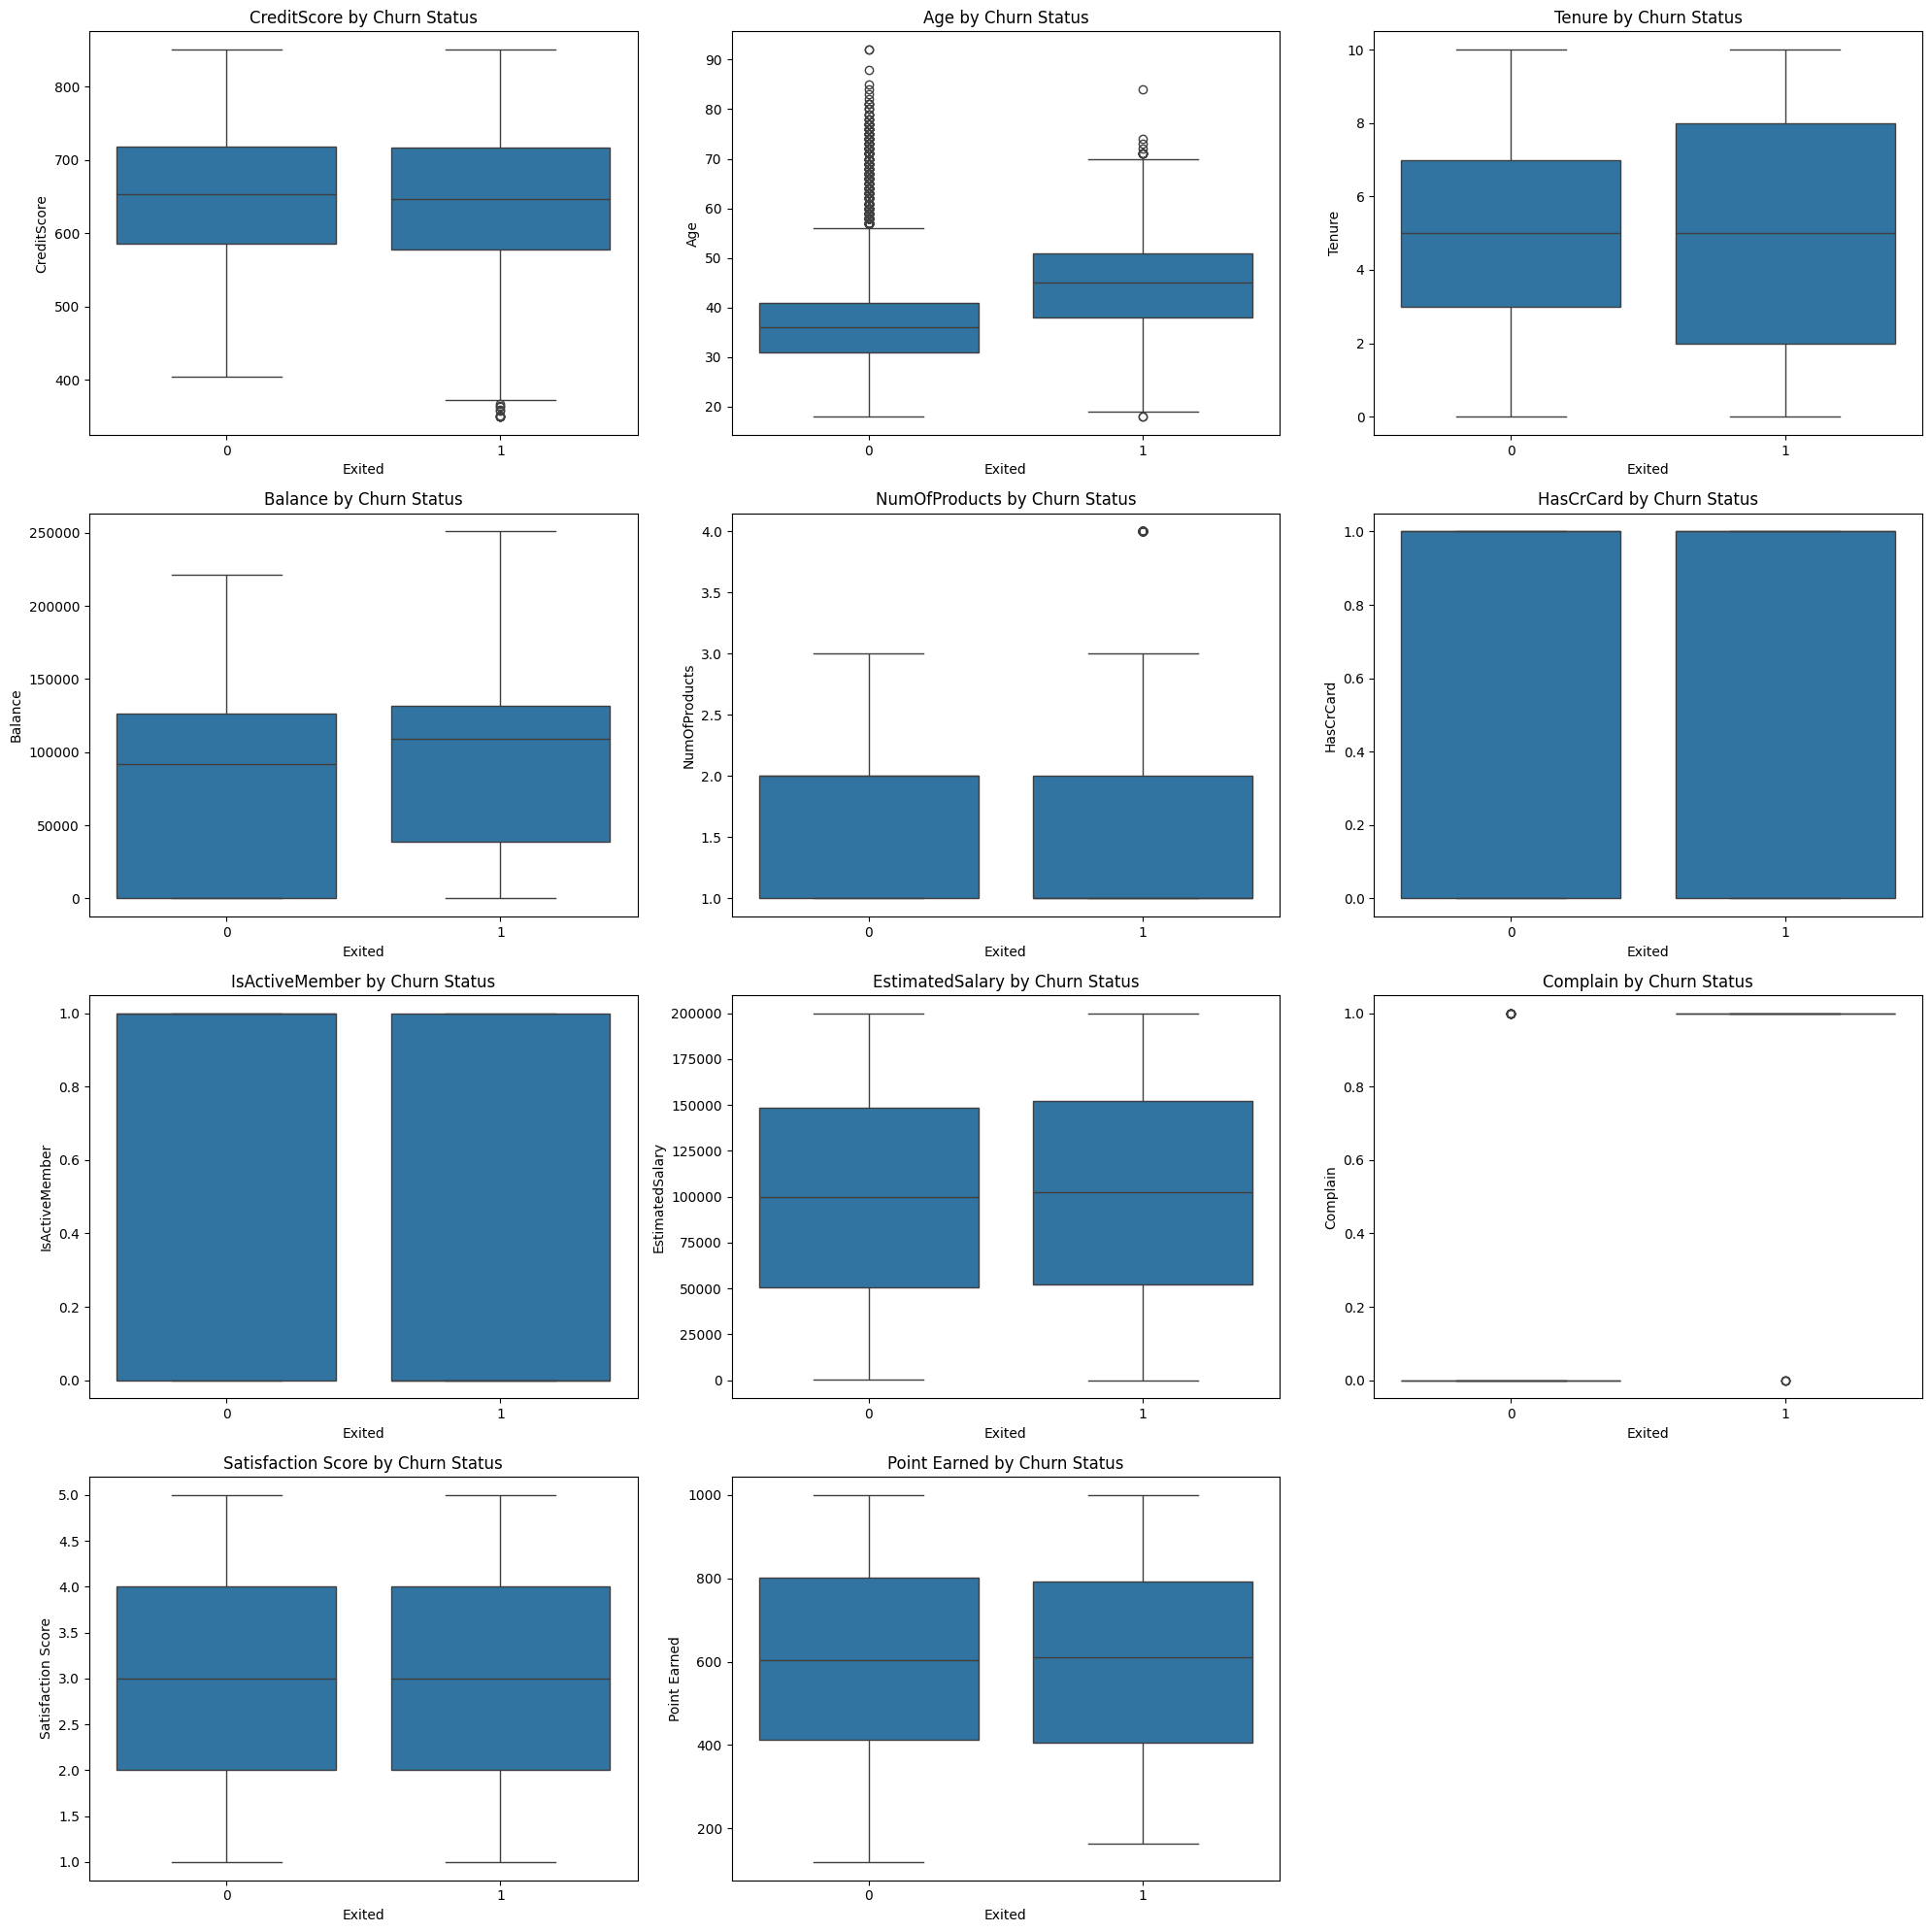

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of all numerical features
numerical_features = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
    'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain',
    'Satisfaction Score', 'Point Earned'
]

# Define the figure size
plt.figure(figsize=(20, 20))

# Loop through each numerical feature and create a box plot
for i, feature in enumerate(numerical_features, 1):
    plt.subplot((len(numerical_features) + 2) // 3, 3, i)  # Adjust grid size
    sns.boxplot(x='Exited', y=feature, data=df)
    plt.title(f'{feature} by Churn Status')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


<a id="5"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 5: Data Preprocessing 🔧</h2>
</div>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset (assuming df is already loaded)
# df = pd.read_csv("your_dataset.csv")  # Uncomment if loading from a CSV file

# Drop unnecessary columns
df_model = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Identify categorical and numerical columns
categorical_cols = ['Geography', 'Gender', 'Card Type']
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                  'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain',
                  'Satisfaction Score', 'Point Earned']

# Apply One-Hot Encoding for categorical features
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# Define features (X) and target variable (y)
X = df_model.drop('Exited', axis=1)
y = df_model['Exited']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)  # Ensures class balance in split

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame (optional for better readability)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print dataset shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (8000, 17)
Testing set shape: (2000, 17)


In [ ]:

# ---------------------------- SVM Model ----------------------------
print("\nTraining Support Vector Machine (SVM)...")
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # RBF Kernel
svm_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate SVM
print("\nSVM Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# ---------------------------- Random Forest Model ----------------------------
print("\nTraining Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # No need to scale for tree-based models

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Training Support Vector Machine (SVM)...

SVM Model Evaluation:
Accuracy: 0.9985
Confusion Matrix:
 [[1591    1]
 [   2  406]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Training Random Forest Classifier...

Random Forest Model Evaluation:
Accuracy: 0.9985
Confusion Matrix:
 [[1591    1]
 [   2  406]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset (if not already loaded)
# df = pd.read_csv("your_dataset.csv")  # Uncomment if loading from file

# Drop unnecessary columns
df_model = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Identify categorical and numerical columns
categorical_cols = ['Geography', 'Gender', 'Card Type']
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
                  'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Complain',
                  'Satisfaction Score', 'Point Earned']

# Outlier Detection & Removal using IQR
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

df_model_clean = remove_outliers(df_model, numerical_cols)

# One-Hot Encode categorical features
df_model_clean = pd.get_dummies(df_model_clean, columns=categorical_cols, drop_first=True)

# Define features (X) and target variable (y)
X = df_model_clean.drop('Exited', axis=1)
y = df_model_clean['Exited']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)  # Ensures class balance

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame (optional for better readability)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# ---------------------------- SVM Model ----------------------------
print("\nTraining Support Vector Machine (SVM)...")
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # RBF Kernel
svm_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate SVM
print("\nSVM Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# ---------------------------- Random Forest Model ----------------------------
print("\nTraining Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # No need to scale for tree-based models

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("\nRandom Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))



Training Support Vector Machine (SVM)...

SVM Model Evaluation:
Accuracy: 0.999348109517601
Confusion Matrix:
 [[1533    0]
 [   1    0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1533
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1534
   macro avg       0.50      0.50      0.50      1534
weighted avg       1.00      1.00      1.00      1534


Training Random Forest Classifier...

Random Forest Model Evaluation:
Accuracy: 0.999348109517601
Confusion Matrix:
 [[1533    0]
 [   1    0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1533
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1534
   macro avg       0.50      0.50      0.50      1534
weighted avg       1.00      1.00      1.00      1534

